## Avocado Project
C SOMA SEKHAR GOUD

BATCH.NO: DS2307

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [163]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Data Exploration and Analysis

In [164]:
#drop Unnamed: 0 column
df.drop(df.columns[0], axis =1, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [165]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


* No Null values

* 3 string/text columns(Date,type,Region) & 10 numeric columns



In [167]:
# Regions 
print("Regions:", df['region'].unique())

print('No.of Regions:',len(df['region'].unique()))

Regions: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
No.of Regions: 54


* There are 54 regions where avocados are being supplied

In [168]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


* Price ranges from 0.44 to 3.25 and avg.prices is 1.41 

* The volume ranges from a minimum of 84.56 units to a maximum of 62,505,650 units.

* PLU Categories (4046, 4225, 4770) represent different varieties of avocados identified by PLU codes.


* The total bags sold have a mean of around 239,639, with a wide distribution (standard deviation = 986,242).The majority of bags are small bags, with a mean of approximately 182,195.

## Data Preprocessing and Visualization

In [169]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [170]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [171]:
df['region'].value_counts()

Seattle                338
Nashville              338
RaleighGreensboro      338
Indianapolis           338
Portland               338
Plains                 338
StLouis                338
Boise                  338
Northeast              338
Pittsburgh             338
Syracuse               338
NewYork                338
LosAngeles             338
Detroit                338
CincinnatiDayton       338
SouthCentral           338
GrandRapids            338
HarrisburgScranton     338
Louisville             338
GreatLakes             338
Columbus               338
SouthCarolina          338
TotalUS                338
Charlotte              338
RichmondNorfolk        338
Houston                338
Denver                 338
LasVegas               338
NewOrleansMobile       338
Sacramento             338
PhoenixTucson          338
NorthernNewEngland     338
California             338
Atlanta                338
Philadelphia           338
BaltimoreWashington    338
HartfordSpringfield    338
M

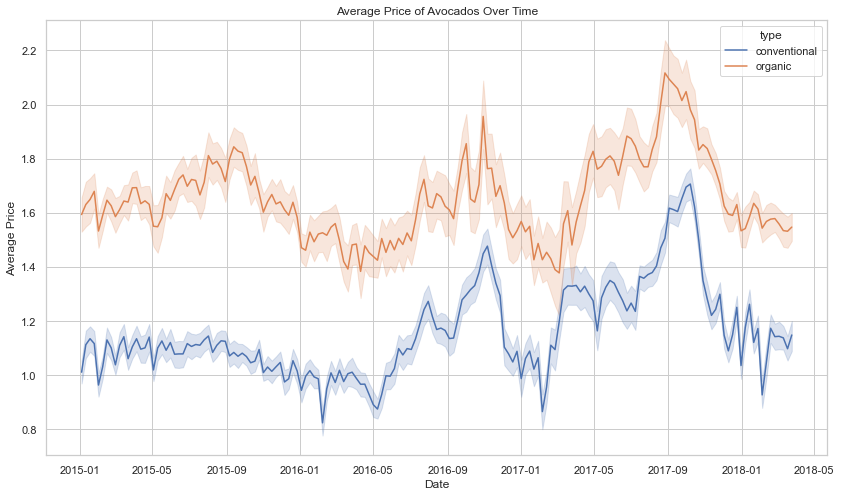

In [114]:
sns.set(style="whitegrid")

# Plotting the average price over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='AveragePrice', data=df, hue='type')
plt.title('Average Price of Avocados Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

* It's clear that the prices of organic Avocados are always higher than conventional Avocados.
And the price fluctuation is almost same.


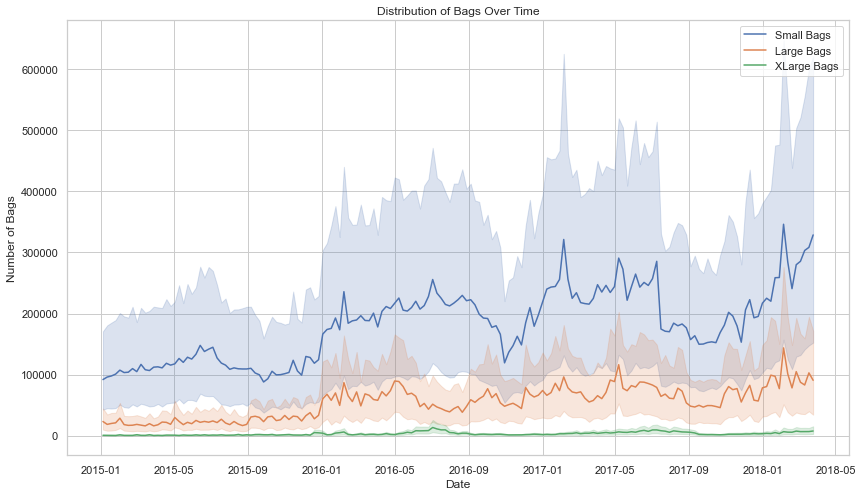

In [115]:
sns.set(style="whitegrid")

# Plotting the distribution of bags over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Small Bags', data=df, label='Small Bags')
sns.lineplot(x='Date', y='Large Bags', data=df, label='Large Bags')
sns.lineplot(x='Date', y='XLarge Bags', data=df, label='XLarge Bags')

plt.title('Distribution of Bags Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bags')
plt.legend()
plt.show()

* This line plot shows how the average price of avocados (conventional and organic) changes over time.

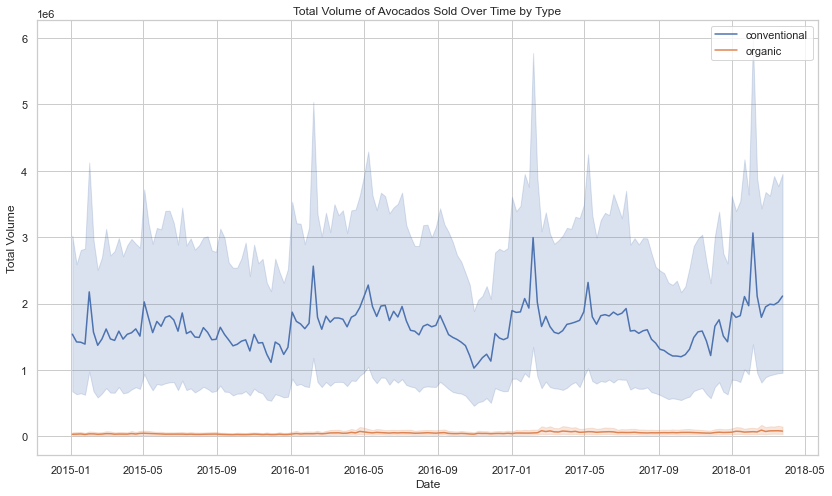

In [116]:
# Visualize the total volume sold for each type over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Total Volume', data=df, hue='type')
plt.title('Total Volume of Avocados Sold Over Time by Type')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()
plt.show()



* This line plot illustrates how the total volume of avocados sold (conventional and organic) changes over time.

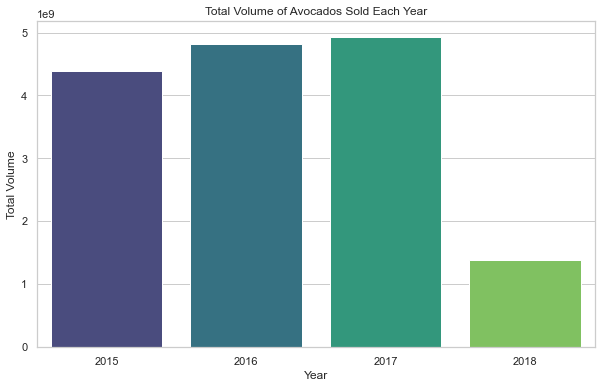

In [117]:
sns.set(style="whitegrid")

# Create a bar plot of total volumes by year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='Total Volume', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Volume of Avocados Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

* The sales have increased from 2015-2017(2017 being the highest) and a sudden drop in 2018

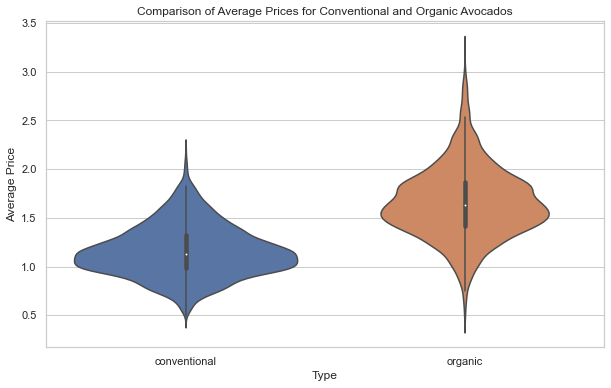

In [118]:
# Compare average prices between conventional and organic avocados using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='AveragePrice', data=df)
plt.title('Comparison of Average Prices for Conventional and Organic Avocados')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

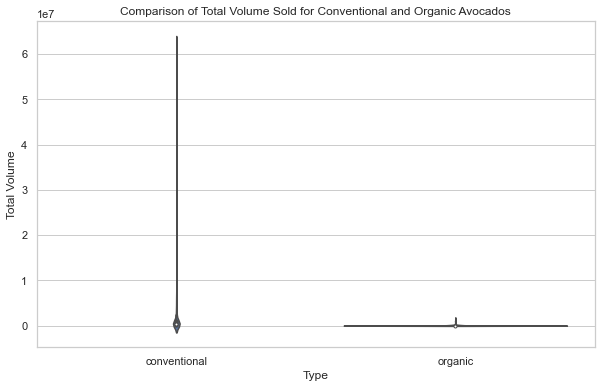

In [119]:
# Compare total volume sold between conventional and organic avocados using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='Total Volume', data=df)
plt.title('Comparison of Total Volume Sold for Conventional and Organic Avocados')
plt.xlabel('Type')
plt.ylabel('Total Volume')
plt.show()

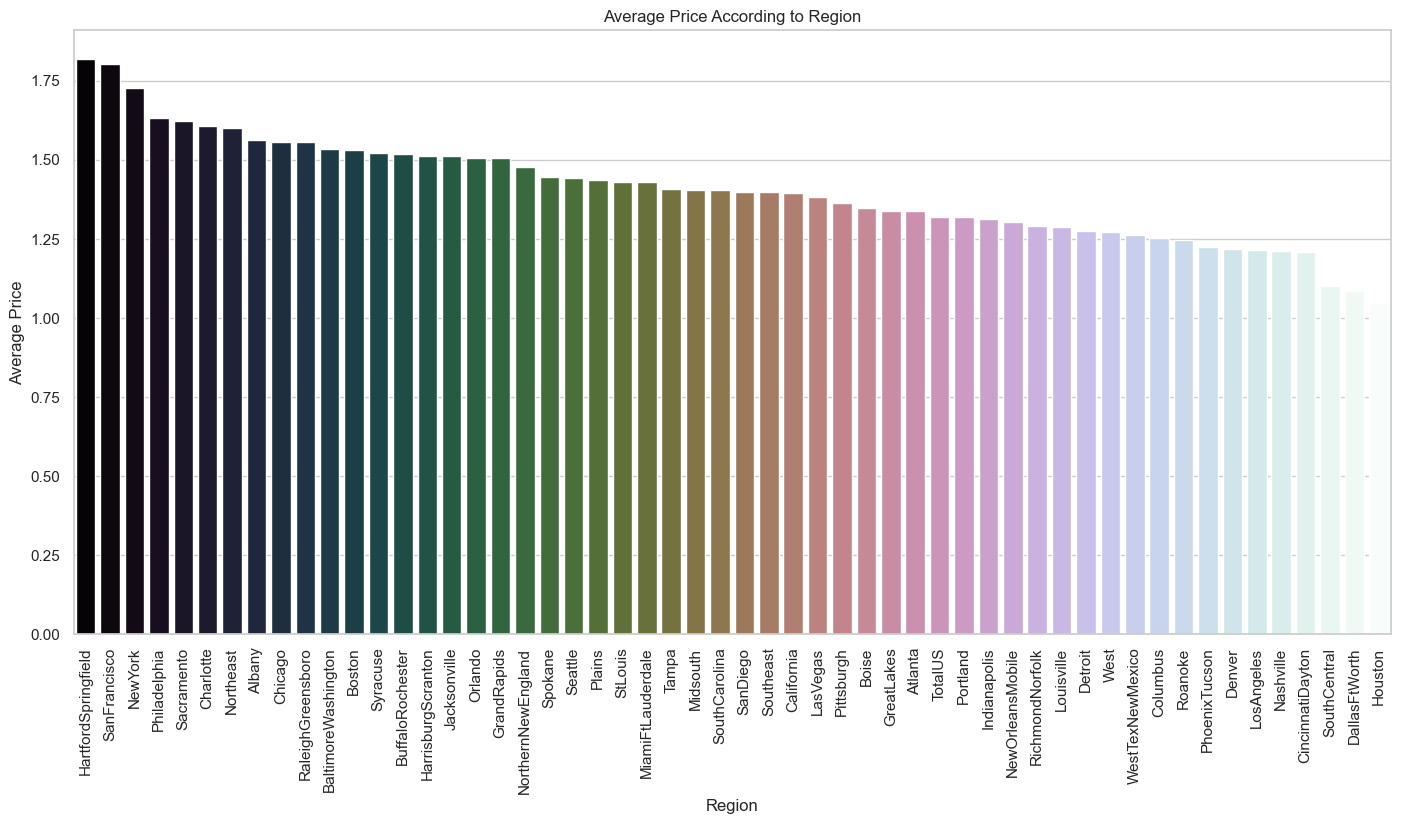

In [120]:
sns.set(style="whitegrid")

# Calculate average prices by region
region_wise = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).reset_index()

# Create a bar plot of average prices by region
plt.figure(figsize=(17, 8), dpi=100)
sns.barplot(x='region', y='AveragePrice', data=region_wise, palette='cubehelix')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')
plt.show()

 * Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

<AxesSubplot:>

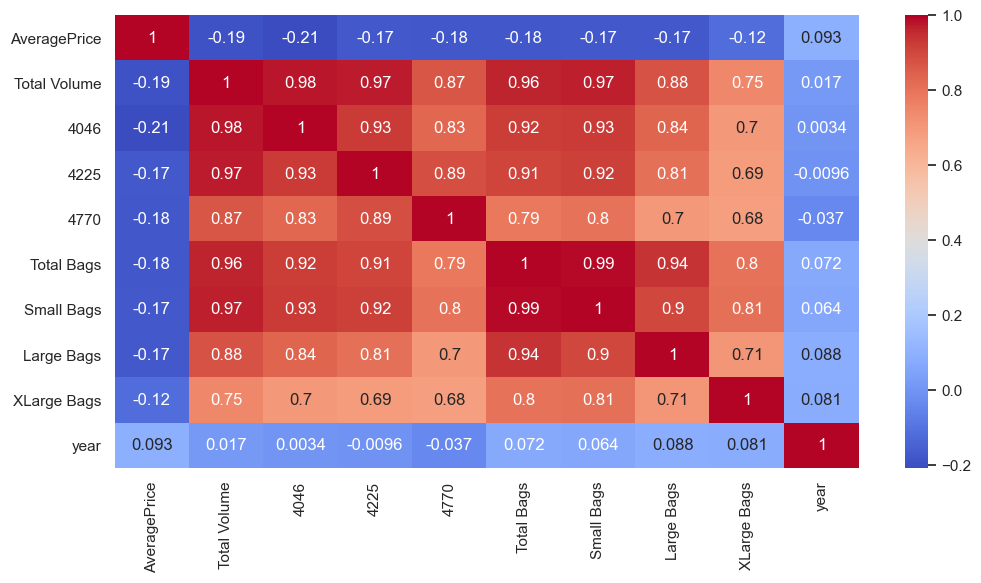

In [121]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

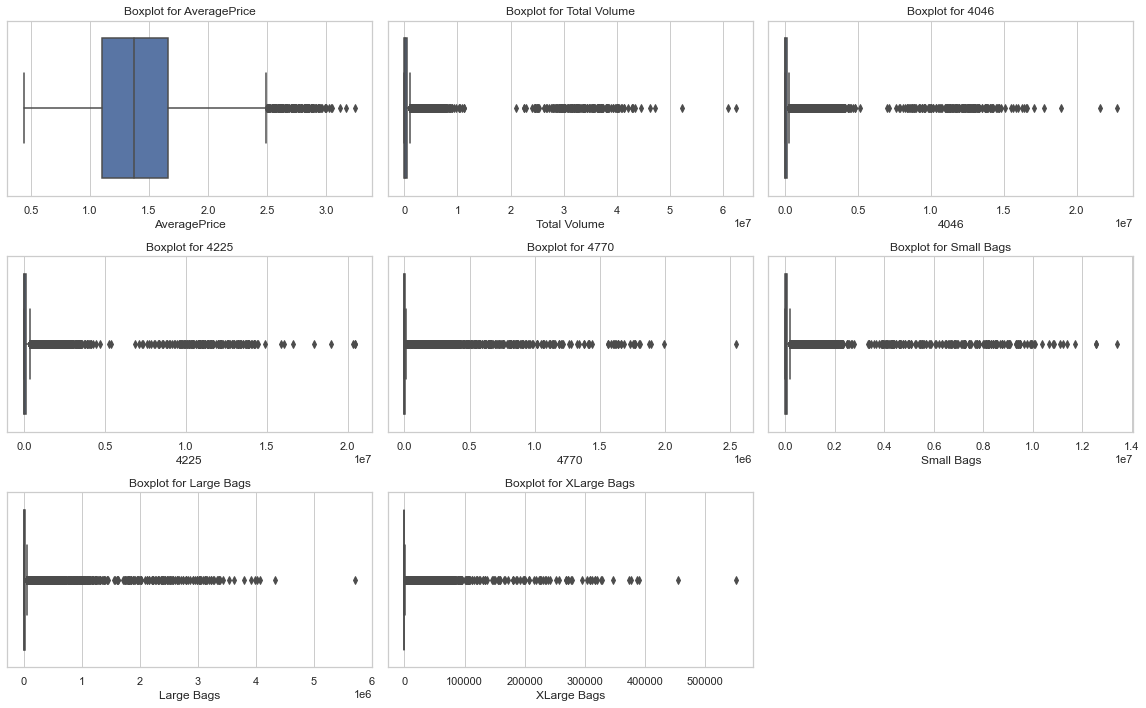

In [172]:
# Select relevant columns
columns_to_check = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create boxplots with outliers highlighted
plt.figure(figsize=(16, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # Adjusted to 3 rows, 3 columns
    sns.boxplot(x=df[column], showfliers=True)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



In [66]:
from scipy import stats

# Function to remove outliers using Z-score
def remove_outliers_zscore(data, feature, threshold):
    z_scores = stats.zscore(data[feature])
    return data[(z_scores < threshold) & (z_scores > -threshold)]

# Specify individual thresholds for each feature
individual_thresholds_zscore = {
    'AveragePrice': 3.75,
    'Total Volume': 6.25,
    
    'Small Bags': 1.35,
    'Large Bags': 4.5,
    'XLarge Bags': 400000
}

# Create a copy of the original DataFrame
df_zscore = df.copy()

# Apply Z-score method to remove outliers for each feature
for feature, threshold in individual_thresholds_zscore.items():
    df_zscore = remove_outliers_zscore(df_zscore, feature, threshold)

# Display the shape before and after removing outliers
print(f'Shape After removing outliers using Z-score: {df_zscore.shape}')
print(f'Shape Before removing outliers: {df.shape}')


Shape After removing outliers using Z-score: (16598, 13)
Shape Before removing outliers: (18249, 13)


* Using z-score method to remove outliers leads to 9% of data loss. Same thing goes to IQR method

In [173]:
#Drop date column
df.drop(columns=["Date"],inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [174]:
# Removing outliers
from numpy import percentile

columns = df.columns

for column in columns:
    if isinstance(df[column][0], str):
        continue
    else:
        # Define quartiles
        quartiles = percentile(df[column], [25, 75])
        
        # Calculate min/max
        lower_fence = quartiles[0] - (1.5 * (quartiles[1] - quartiles[0]))
        upper_fence = quartiles[1] + (1.5 * (quartiles[1] - quartiles[0]))
        
        # Remove outliers
        df[column] = df[column].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

* Iterating through each column in the dataset and performing the outlier removal based on the provided quartile and fences. Outliers are replaced with the upper or lower fence values.

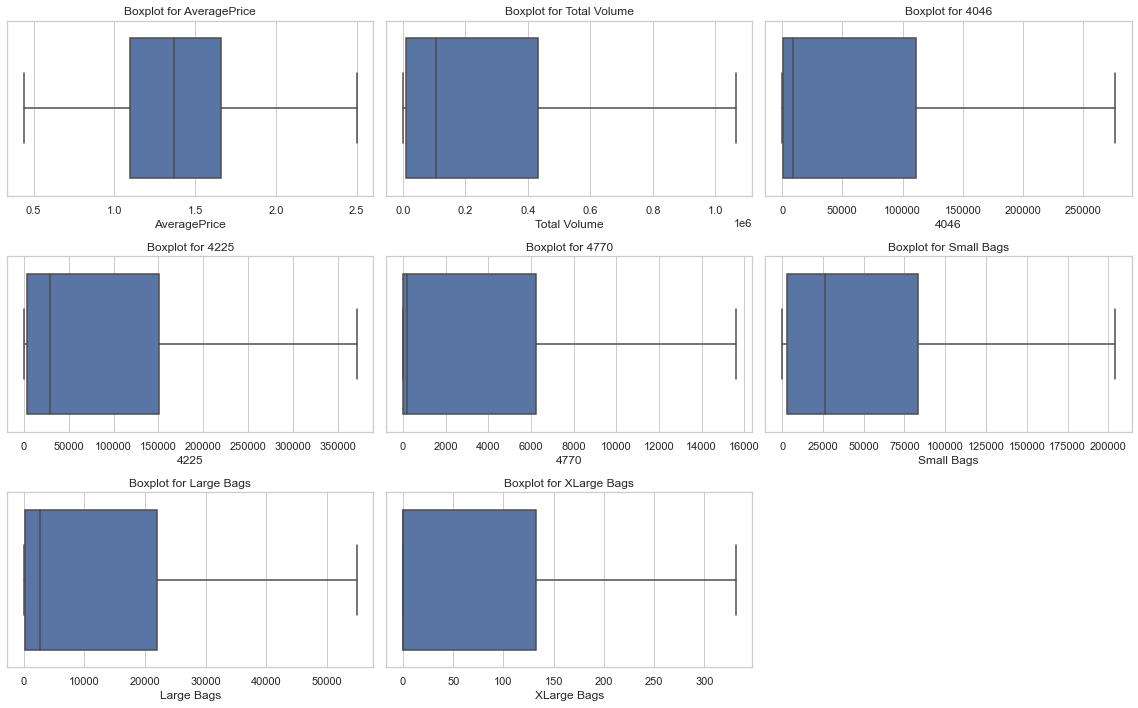

In [175]:
# Select relevant columns
columns_to_check = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create boxplots with outliers highlighted
plt.figure(figsize=(16, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # Adjusted to 3 rows, 3 columns
    sns.boxplot(x=df[column], showfliers=True)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



In [129]:
df.shape

(18249, 12)

In [176]:
# Making a copy for classification task
dfc = df.copy()

### Dealing with  Categorical Variables

In [146]:
from sklearn.preprocessing import OneHotEncoder


# Assume 'type' and 'region' are categorical columns in your dataset
categorical_columns = ['type', 'region']

# Create a DataFrame containing only the categorical columns
df_categorical = df[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical).toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)


In [147]:
# Display the modified DataFrame
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'type_conventional',
       'type_organic', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'r

## Modeling| Regression

In [133]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [154]:
# Assigining Feature and target variable
X_regression=df.drop(['AveragePrice'],axis=1)
y_regression=df['AveragePrice']

In [155]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply standard scaling only to numerical columns
X_regression= scaler.fit_transform(X)
X_regression
# Now, df contains the standardized numerical columns

array([[-0.60712774, -0.69011448, -0.33244626, ..., -0.13737207,
        -0.13737207, -0.13674962],
       [-0.63241146, -0.69376675, -0.40617828, ..., -0.13737207,
        -0.13737207, -0.13674962],
       [-0.46129887, -0.69255336,  0.07838741, ..., -0.13737207,
        -0.13737207, -0.13674962],
       ...,
       [-0.74346476, -0.68855083, -0.72305358, ..., -0.13737207,
        -0.13737207,  7.31263474],
       [-0.73687762, -0.68516809, -0.71908569, ..., -0.13737207,
        -0.13737207,  7.31263474],
       [-0.7334081 , -0.6713923 , -0.72377963, ..., -0.13737207,
        -0.13737207,  7.31263474]])

## Train Test Split

In [150]:
# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [152]:
# Define the regression models
regressors = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), 
              GradientBoostingRegressor()]

# Finding the random state
def find_best_random_state_regression(X, y, model, test_size=0.3, max_random_state=200):
    min_mse = float('inf')
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        mse = mean_squared_error(y_test, predictions)
        
        if mse < min_mse:
            min_mse = mse
            best_random_state = random_state

    return min_mse, best_random_state

# Initialize variables to store random state values
lr_rs = svr_rs = dt_reg_rs = rf_reg_rs = gb_reg_rs = None

# Loop through each regression model
for regressor in regressors:
    best_mse, best_random_state = find_best_random_state_regression(X_regression, y_regression, regressor)
    print(f"Best MSE for {regressor.__class__.__name__} is {best_mse} at random state {best_random_state}")
    
    # Assign the random state value to the respective variable
    if isinstance(regressor, LinearRegression):
        lr_rs = best_random_state
    elif isinstance(regressor, SVR):
        svr_rs = best_random_state
    elif isinstance(regressor, DecisionTreeRegressor):
        dt_reg_rs = best_random_state
    elif isinstance(regressor, RandomForestRegressor):
        rf_reg_rs = best_random_state
    elif isinstance(regressor, GradientBoostingRegressor):
        gb_reg_rs = best_random_state

Best MSE for LinearRegression is 0.061305309350159695 at random state 113
Best MSE for SVR is 0.03823781365107706 at random state 8
Best MSE for DecisionTreeRegressor is 0.04074473188276614 at random state 189
Best MSE for RandomForestRegressor is 0.022089773939014085 at random state 189
Best MSE for GradientBoostingRegressor is 0.04801384318230298 at random state 8


In [153]:
# Set the random seed for reproducibility
np.random.seed(42)  # You can use any seed value

# Assuming you have X_regression and y_regression defined

# Split the data into train and test sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=lr_rs  # Use the best random state for Linear Regression
)

# Initialize regression models
models_regression = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(), 
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=dt_reg_rs),
    'Random Forest Regressor': RandomForestRegressor(random_state=rf_reg_rs),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=gb_reg_rs)
}

# Dictionary to store results
results_regression = {'Model': [], 'R2 Score': [], 'CV Score': [], 'Difference': []}

# Loop through each model
for model_name, model in models_regression.items():
    # Set random seed for models that support it
    if model_name in ['Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor']:
        np.random.seed(42)  # You can use any seed value
    
    # Train the model
    model.fit(X_train_regression, y_train_regression)
    
    # Make predictions
    y_pred_regression = model.predict(X_test_regression)
    
    # Calculate R2 score
    r2_regression = r2_score(y_test_regression, y_pred_regression)
    
    # Calculate cross-validation score
    cv_score_regression = cross_val_score(model, X_regression, y_regression, cv=5, scoring='neg_mean_squared_error').mean()
    
    # Calculate the difference between accuracy and cross-validation score
    diff_regression = r2_regression + cv_score_regression
    
    # Store results in the dictionary
    results_regression['Model'].append(model_name)
    results_regression['R2 Score'].append(r2_regression)
    results_regression['CV Score'].append(cv_score_regression)
    results_regression['Difference'].append(diff_regression)

# Print the results
for i in range(len(results_regression['Model'])):
    print(f"Model: {results_regression['Model'][i]}")
    print(f"R2 Score: {results_regression['R2 Score'][i]:.4f}")
    print(f"CV Score: {results_regression['CV Score'][i]:.4f}")
    print(f"Difference: {results_regression['Difference'][i]:.4f}")
    print("-" * 50)

Model: Linear Regression
R2 Score: 0.6208
CV Score: -0.0772
Difference: 0.5436
--------------------------------------------------
Model: SVR
R2 Score: 0.7552
CV Score: -0.0824
Difference: 0.6729
--------------------------------------------------
Model: Decision Tree Regressor
R2 Score: 0.7278
CV Score: -0.1297
Difference: 0.5981
--------------------------------------------------
Model: Random Forest Regressor
R2 Score: 0.8582
CV Score: -0.0733
Difference: 0.7849
--------------------------------------------------
Model: Gradient Boosting Regressor
R2 Score: 0.6955
CV Score: -0.0664
Difference: 0.6291
--------------------------------------------------


* In regression tasks, a lower mean squared error (MSE) is desirable, as it indicates better predictive performance. And also considering the R2Score

> Based on the above metrics, the "Random Forest Regressor" is performing the best among the models.

In [158]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=rf_reg_rs)
rf_regressor.fit(X_train_regression, y_train_regression)

# Make predictions on the test set
y_pred_regression = rf_regressor.predict(X_test_regression)

# Evaluate the model
mse = mean_squared_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.0228
R2 Score: 0.8582


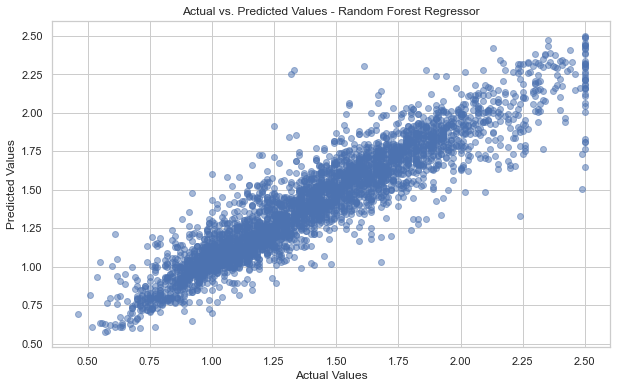

In [159]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_regression, y_pred_regression, alpha=0.5)
plt.title('Actual vs. Predicted Values - Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Classification

In classification model our target variable will be 'type'( conventional, organic)

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [178]:
dfc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [191]:
le = LabelEncoder()

# Label encode the 'region' column
dfc['region'] = le.fit_transform(dfc['region'])


In [192]:
X_classification = dfc.drop(['type'], axis=1)
y_classification = dfc['type']

In [193]:
X_classification

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53


In [194]:
y_classification

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

### Train-Test split

In [212]:
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=107)

In [213]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def classify(model, X, y, best_random_state=None):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=best_random_state)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions for the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy * 100)
    
      # Cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score) * 100)
    
    print('Difference b/w Accuracy & Cross Validation score is:', accuracy-np.mean(score))

     
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)


In [214]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X_classification, y_classification)

Accuracy: 99.03196347031964
CV Score: 97.17786145200223
Difference b/w Accuracy & Cross Validation score is: 0.01854102018317405
Confusion Matrix:
[[2731   17]
 [  36 2691]]
Classification Report:
              precision    recall  f1-score   support

conventional       0.99      0.99      0.99      2748
     organic       0.99      0.99      0.99      2727

    accuracy                           0.99      5475
   macro avg       0.99      0.99      0.99      5475
weighted avg       0.99      0.99      0.99      5475



In [215]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X_classification, y_classification)

Accuracy: 99.74429223744292
CV Score: 98.76695510498278
Difference b/w Accuracy & Cross Validation score is: 0.009773371324601432
Confusion Matrix:
[[2740    6]
 [   8 2721]]
Classification Report:
              precision    recall  f1-score   support

conventional       1.00      1.00      1.00      2746
     organic       1.00      1.00      1.00      2729

    accuracy                           1.00      5475
   macro avg       1.00      1.00      1.00      5475
weighted avg       1.00      1.00      1.00      5475



In [216]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X_classification, y_classification)

Accuracy: 92.94977168949772
CV Score: 91.92830912578789
Difference b/w Accuracy & Cross Validation score is: 0.010214625637098296
Confusion Matrix:
[[2494  296]
 [  90 2595]]
Classification Report:
              precision    recall  f1-score   support

conventional       0.97      0.89      0.93      2790
     organic       0.90      0.97      0.93      2685

    accuracy                           0.93      5475
   macro avg       0.93      0.93      0.93      5475
weighted avg       0.93      0.93      0.93      5475



In [217]:
#Support vector machine classifier

from sklearn.svm import SVC
model = SVC()
classify(model, X_classification, y_classification)

Accuracy: 93.11415525114155
CV Score: 92.83797324844112
Difference b/w Accuracy & Cross Validation score is: 0.0027618200270043136
Confusion Matrix:
[[2549  163]
 [ 214 2549]]
Classification Report:
              precision    recall  f1-score   support

conventional       0.92      0.94      0.93      2712
     organic       0.94      0.92      0.93      2763

    accuracy                           0.93      5475
   macro avg       0.93      0.93      0.93      5475
weighted avg       0.93      0.93      0.93      5475



In [218]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
classify(model, X_classification, y_classification)

Accuracy: 99.59817351598174
CV Score: 99.02460347552528
Difference b/w Accuracy & Cross Validation score is: 0.005735700404564503
Confusion Matrix:
[[2719    8]
 [  14 2734]]
Classification Report:
              precision    recall  f1-score   support

conventional       0.99      1.00      1.00      2727
     organic       1.00      0.99      1.00      2748

    accuracy                           1.00      5475
   macro avg       1.00      1.00      1.00      5475
weighted avg       1.00      1.00      1.00      5475



### Considering the above values we will go with "Support vector machine classifier" (SVC) as the best suitable model